Fictional Product Study
====

Introduction
====

This study will show the analysis on a fake data set downloaded from kaggle.

Importing Libraries
====

In [229]:
#Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc

#Train/Test or CV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

#DataWrangling
from scipy import stats
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
import datetime

Importing Data
====

In [230]:
#import filetype
df1 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_January_2019.csv")
df2 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_February_2019.csv")
df3 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_March_2019.csv")
df4 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_April_2019.csv")
df5 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_May_2019.csv")
df6 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_June_2019.csv")
df7 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_July_2019.csv")
df8 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_August_2019.csv")
df9 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_September_2019.csv")
df10 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_October_2019.csv")
df11 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_November_2019.csv")
df12 = pd.read_csv(r"C:\Users\2-1\Downloads\Sales\Sales_December_2019.csv")

In [231]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [232]:
#Merge
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(dfs)

FIRST EDA
====

In [233]:
#check top 5 rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [234]:
#check column names
print(df.columns.tolist())

['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [235]:
#Change Column Name if necessary
df.rename({'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered','Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'}, axis=1, inplace=True)

In [236]:
#quick summary stats:numeric
df.describe().T

,count,unique,top,freq
Order_ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186305,10,1,168552
Price_Each,186305,24,11.95,21903
Order_Date,186305,142396,Order Date,355
Purchase_Address,186305,140788,Purchase Address,355


In [237]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [238]:
#look at rows/columns
df.shape

(186850, 6)

In [239]:
#look at objects counts
print(df.dtypes.value_counts())

object    6
dtype: int64


In [240]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Order_ID : ['141234' '141235' '141236' ... '319668' '319669' '319670']
Product : ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Quantity_Ordered : ['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' '8']
Price_Each : ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0' '400.0']
Order_Date : ['01/22/19 21:25' '01/28/19 14:15' '01/17/19 13:33' ... '12/01/19 12:01'
 '12/09/19 06:43' '12/03/19 10:39']
Purchase_Address : ['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Ad

In [241]:
df = df[df.Quantity_Ordered != 'Quantity Ordered']
df = df[df.Price_Each != 'Price Each']

In [242]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Order_ID : ['141234' '141235' '141236' ... '319668' '319669' '319670']
Product : ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan]
Quantity_Ordered : ['1' '2' '3' '5' '4' nan '7' '6' '9' '8']
Price_Each : ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 '700.0' '150.0' '300.0' '1700.0' '400.0']
Order_Date : ['01/22/19 21:25' '01/28/19 14:15' '01/17/19 13:33' ... '12/01/19 12:01'
 '12/09/19 06:43' '12/03/19 10:39']
Purchase_Address : ['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ...
 '273

Data Wrangling
===

Check Nulls
====

In [243]:
#check for null
df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [244]:
#replacing null values with panda null values
df = df.replace('$nan$', np.NaN)

In [245]:
#check for null after
df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

Replace/Drop Nulls
====

In [246]:
#drop all rows with nulls
df = df.dropna()

In [247]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [248]:
#check for null after
df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

Look for Duplicates
====

In [249]:
#look for duplicates
df.duplicated().sum()

264

In [250]:
#drop duplicates
df = df.drop_duplicates()

In [251]:
#look for duplicates
df.duplicated().sum()

0

Look for Outliers
====

In [252]:
#summary stats
df.describe().T

,count,unique,top,freq
Order_ID,185686,178437,160873,5
Product,185686,19,USB-C Charging Cable,21859
Quantity_Ordered,185686,9,1,168291
Price_Each,185686,23,11.95,21859
Order_Date,185686,142395,12/15/19 20:16,8
Purchase_Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9


In [253]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,185686,185686,185686,185686,185686,185686
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [254]:
df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [255]:
#Object > Float
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(float)
df['Price_Each'] = df['Price_Each'].astype(float)

In [256]:
out = df.loc[:,['Quantity_Ordered', 'Price_Each']]
z = np.abs(stats.zscore(out))
print(z)
threshold = 3
print(np.where(z > 3))

        Quantity_Ordered  Price_Each
0               0.281094    1.548721
1               0.281094    0.509457
2               1.975898    0.518350
3               0.281094    0.103740
4               0.281094    0.518350
...                  ...         ...
185945          0.281094    0.509457
185946          1.975898    0.542836
185947          0.281094    0.647395
185948          0.281094    0.518350
185949          0.281094    0.253961

[185686 rows x 2 columns]
(array([    11,     12,     52, ..., 185636, 185654, 185656], dtype=int64), array([1, 0, 0, ..., 1, 1, 1], dtype=int64))


In [257]:
#look at outliers
print(out.loc[[ 11, 12, 52, 185636, 185654, 185656]])

        Quantity_Ordered  Price_Each
11                   1.0     1700.00
12                   3.0        2.99
52                   3.0        2.99
185636               1.0       11.95
185654               1.0       14.95
185656               1.0      149.99


In [258]:
df.loc[df['Price_Each'] > 150]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
6,141240,27in 4K Gaming Monitor,1.0,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
11,141245,Macbook Pro Laptop,1.0,1700.00,01/31/19 10:12,"322 6th St, San Francisco, CA 94016"
14,141248,Flatscreen TV,1.0,300.00,01/03/19 21:54,"363 Spruce St, Austin, TX 73301"
16,141250,Vareebadd Phone,1.0,400.00,01/10/19 11:20,"471 Center St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185936,319657,LG Dryer,1.0,600.00,12/05/19 13:22,"159 Lake St, Portland, OR 97035"
185942,319663,Flatscreen TV,1.0,300.00,12/07/19 08:25,"334 12th St, Atlanta, GA 30301"
185943,319664,ThinkPad Laptop,1.0,999.99,12/30/19 01:06,"767 2nd St, San Francisco, CA 94016"
185944,319665,iPhone,1.0,700.00,12/15/19 11:13,"377 1st St, Atlanta, GA 30301"


Outlier Decision
===

In [259]:
#Not Deleting Any Outlier

Change Data Type
===

In [260]:
#Date
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [261]:
#Adding Quarter and Month Columns for Groupby
df['Order_Day'] = df['Order_Date'].dt.to_period('D')
df['Order_Quarter'] = df['Order_Date'].dt.to_period('Q')
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df['Quarter'] = df['Order_Date'].dt.quarter
df['Month'] = pd.DatetimeIndex(df['Order_Date']).month

In [262]:
#Getting States / Zip Codes
df["City"] = df["Purchase_Address"].str.split(",", expand=True)[1]
df["Dummy"] = df["Purchase_Address"].str.split(",", expand=True)[2]
df["State"] = df["Dummy"].str.split(" ", expand=True)[1]
df["Zip"] = df["Dummy"].str.split(" ", expand=True)[2]
df.drop(['Dummy'], axis=1, inplace=True)

In [263]:
#Region List
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']

In [264]:
#Getting Regions
s=pd.DataFrame([west,midwest,south,northeast],index=['West','Midwest','South','Northeast'])
s=s.reset_index().melt('index')
df['Region'] = df['State'].map(dict(zip(s['value'],s['index'])))

In [265]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,2019Q1,2019-01,1,1,Boston,MA,02215,Northeast
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,2019Q1,2019-01,1,1,Portland,OR,97035,West
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,2019Q1,2019-01,1,1,San Francisco,CA,94016,West
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,2019Q1,2019-01,1,1,Los Angeles,CA,90001,West
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,2019Q1,2019-01,1,1,Austin,TX,73301,South


Transforming
===

In [266]:
#Calculated/Derived Field
df["Total"] = df["Quantity_Ordered"]  * df["Price_Each"] 

In [267]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region,Total
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-22,2019Q1,2019-01,1,1,Boston,MA,02215,Northeast,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-28,2019Q1,2019-01,1,1,Portland,OR,97035,West,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-17,2019Q1,2019-01,1,1,San Francisco,CA,94016,West,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-05,2019Q1,2019-01,1,1,Los Angeles,CA,90001,West,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-25,2019Q1,2019-01,1,1,Austin,TX,73301,South,11.99


In [268]:
df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Day,Order_Quarter,Order_Month,Quarter,Month,City,State,Zip,Region,Total
185945,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019-12-11,2019Q4,2019-12,4,12,San Francisco,CA,94016,West,14.95
185946,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019-12-01,2019Q4,2019-12,4,12,Los Angeles,CA,90001,West,7.68
185947,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019-12-09,2019Q4,2019-12,4,12,Seattle,WA,98101,West,400.00
185948,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019-12-03,2019Q4,2019-12,4,12,Dallas,TX,75001,South,11.99
185949,319670,Bose SoundSport Headphones,1.0,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",2019-12-21,2019Q4,2019-12,4,12,Los Angeles,CA,90001,West,99.99


In [269]:
#Creating Category
df['Category'] = 0
#Add to column
df.loc[df['Product'] == 'iPhone', 'Category'] = 'Phone'
df.loc[df['Product'] == 'Vareebadd Phone', 'Category'] = 'Phone'
df.loc[df['Product'] == 'Google Phone', 'Category'] = 'Phone'
df.loc[df['Product'] == '20in Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '27in 4K Gaming Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '27in FHD Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == '34in Ultrawide Monitor', 'Category'] = 'Monitor'
df.loc[df['Product'] == 'AA Batteries (4-pack)', 'Category'] = 'Batteries'
df.loc[df['Product'] == 'AAA Batteries (4-pack)', 'Category'] = 'Batteries'
df.loc[df['Product'] == 'Flatscreen TV', 'Category'] = 'TV'
df.loc[df['Product'] == 'LG Washing Machine', 'Category'] = 'Appliance'
df.loc[df['Product'] == 'LG Dryer', 'Category'] = 'Appliance'
df.loc[df['Product'] == 'Lightning Charging Cable', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Apple Airpods Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Wired Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Bose SoundSport Headphones', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'USB-C Charging Cable', 'Category'] = 'Accessories'
df.loc[df['Product'] == 'Macbook Pro Laptop', 'Category'] = 'Laptop'
df.loc[df['Product'] == 'ThinkPad Laptop', 'Category'] = 'Laptop'

In [270]:
#look at target variable spread
df['Category'].value_counts(normalize=True)

Accessories    0.490834
Batteries      0.221718
Monitor        0.129224
Phone          0.077696
Laptop         0.047645
TV             0.025818
Appliance      0.007066
Name: Category, dtype: float64

Descriptive Analysis
===

In [271]:
#Simple
pd.crosstab(index=df['Price_Each'], columns=df['Product'], margins = True)

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone,All
Price_Each,,,,,,,,,,,,,,,,,,,,
2.99,0,0,0,0,0,20612,0,0,0,0,0,0,0,0,0,0,0,0,0,20612
3.84,0,0,0,0,20558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20558
11.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21859,0,0,0,21859
11.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18849,0,18849
14.95,0,0,0,0,0,0,0,0,0,0,0,0,21610,0,0,0,0,0,0,21610
99.99,0,0,0,0,0,0,0,13298,0,0,0,0,0,0,0,0,0,0,0,13298
109.99,4098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4098
149.99,0,0,7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7498
150.0,0,0,0,0,0,0,15525,0,0,0,0,0,0,0,0,0,0,0,0,15525


<AxesSubplot:xlabel='Region', ylabel='Total'>

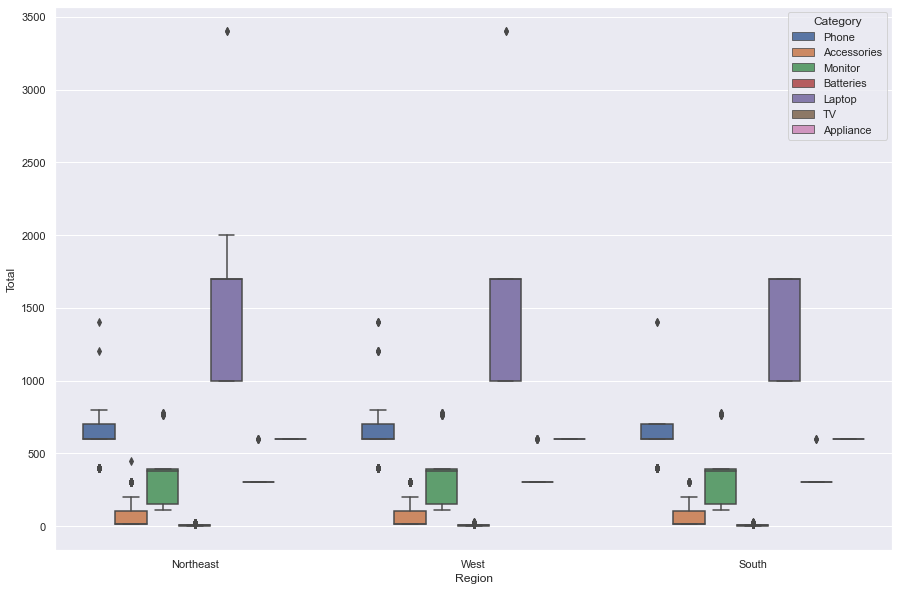

In [272]:
#Overall BoxWhisker
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x="Region", y="Total", hue="Category", data=df, )

Region
====

In [273]:
#Check Chi-Square (Need to Revisit)
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['Region'], columns=df['Total'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(126.4841605877296, 0.08528658564277473, 106)

<AxesSubplot:xlabel='Total', ylabel='Region'>

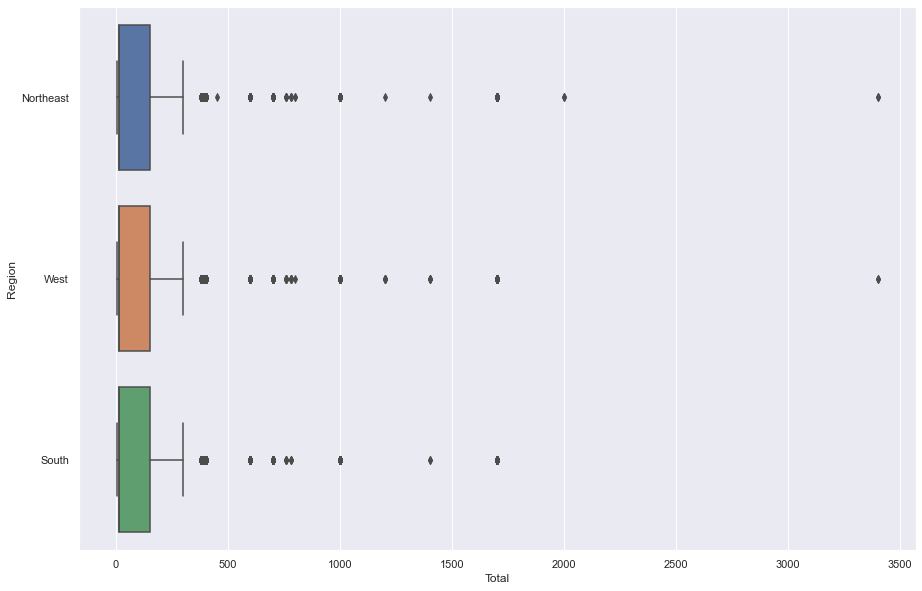

In [274]:
#BoxPlot
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x="Total", y="Region", data=df)

Category
====

In [275]:
#Check Chi-Square (Used in Model)
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['Category'], columns=df['Total'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(945097.7716177546, 0.0, 318)

<AxesSubplot:xlabel='Total', ylabel='Category'>

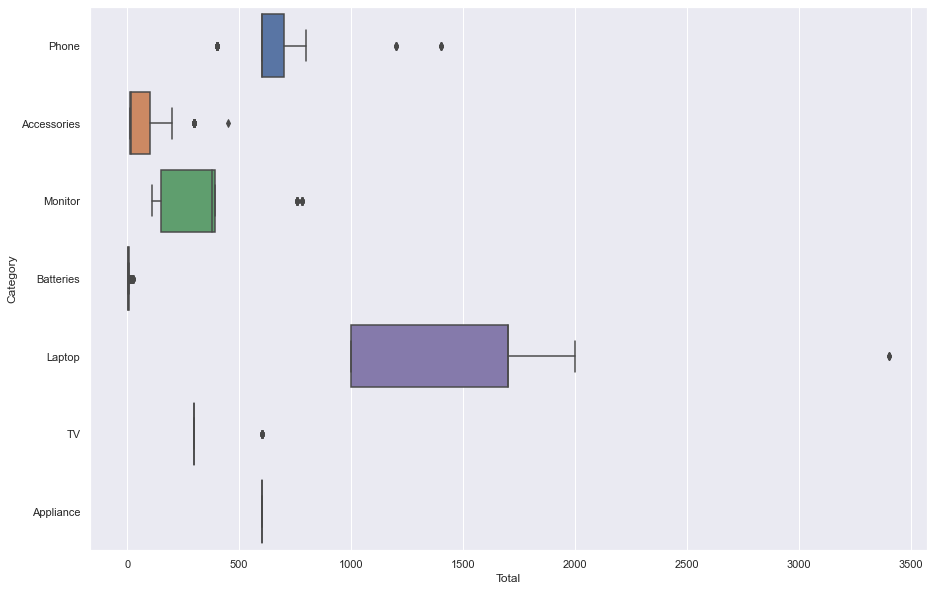

In [276]:
#BoxPlot
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x="Total", y="Category", data=df)

In [277]:
totalorderdaygroup = df.groupby(['Order_Day','Region','Category'])['Total'].sum().T
totalorderday = df.groupby(['Order_Day'])['Total'].sum().T
totalordermonth = df.groupby(['Order_Month'])['Total'].sum().T
totalmonth = df.groupby(['Month'])['Total'].sum().T
totalquarter = df.groupby(['Quarter'])['Total'].sum().T

In [278]:
totalorderday = pd.DataFrame(totalorderday)
#Finished Dataset for Use CSV by Day Total
totalorderday.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Day_Total_Processed.csv')

In [279]:
totalordermonth = pd.DataFrame(totalordermonth)
#Finished Dataset for Use CSV by Month
totalordermonth.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Month_Processed.csv')

In [280]:
totalorderdaygroup = pd.DataFrame(totalorderdaygroup)
#Finished Dataset for Use CSV by Day Grouped
totalorderdaygroup.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Day_Processed.csv')

In [281]:
totalmonth = pd.DataFrame(totalmonth)
totalmonth

,Total
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


<AxesSubplot:xlabel='Month', ylabel='Total'>

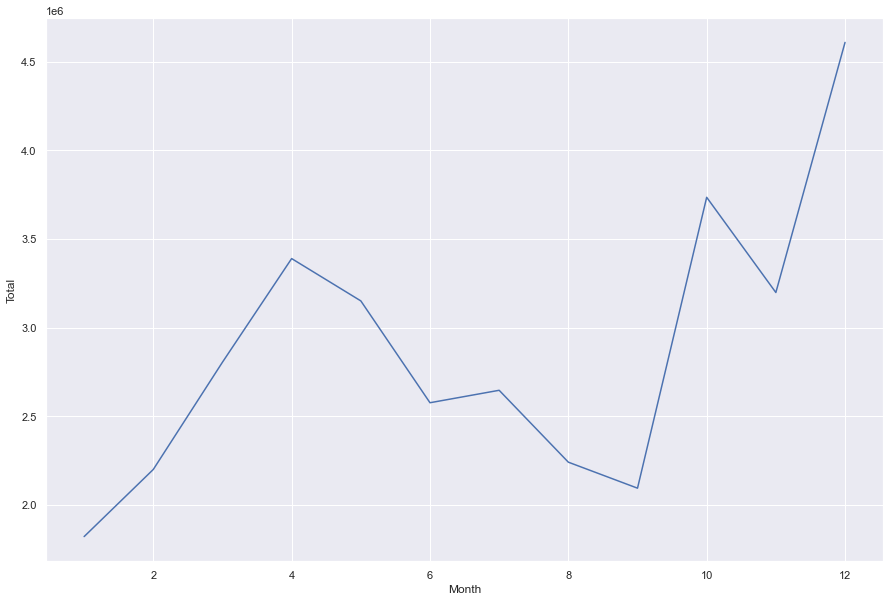

In [282]:
#Show Total Sales by Month
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(data=totalmonth, x="Month", y="Total")

In [283]:
totalquarter = pd.DataFrame(totalquarter)  
totalquarter

,Total
Quarter,
1,6826464.59
2,9116114.36
3,6982010.38
4,11540948.61


<AxesSubplot:xlabel='Quarter', ylabel='Total'>

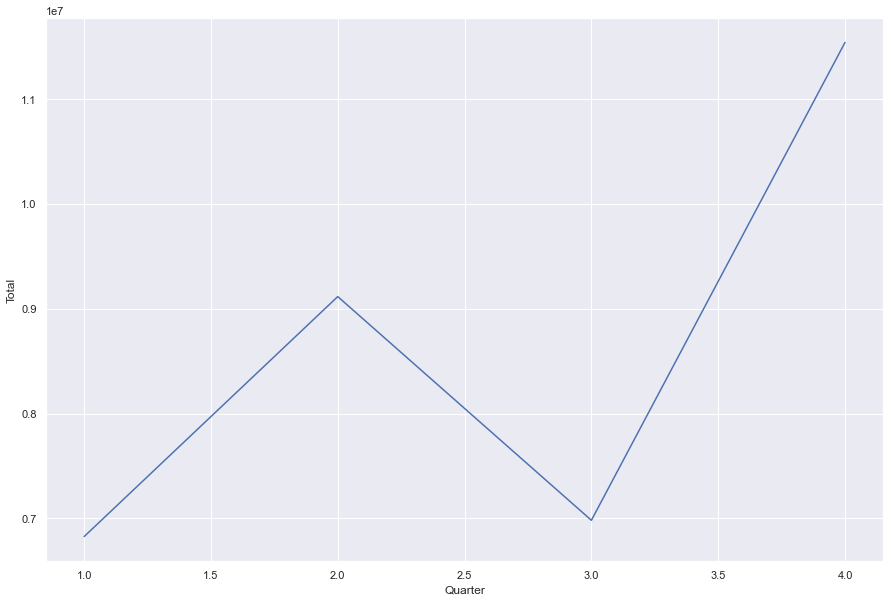

In [284]:
#Show Total Sales by Quarter
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(data=totalquarter, x="Quarter", y="Total")

Looking at Data Types
====

In [285]:
#quick summary stats:numeric
df.describe()

,Quantity_Ordered,Price_Each,Quarter,Month,Total
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,2.681317,7.058653,185.611936
std,0.443069,332.843838,1.135367,3.502932,333.032118
min,1.000000,2.990000,1.000000,1.000000,2.990000
25%,1.000000,11.950000,2.000000,4.000000,11.950000
50%,1.000000,14.950000,3.000000,7.000000,14.950000
75%,1.000000,150.000000,4.000000,10.000000,150.000000
max,9.000000,1700.000000,4.000000,12.000000,3400.000000


In [286]:
#quick summary stats:categorical
df.describe(include='object')

,Order_ID,Product,Purchase_Address,City,State,Zip,Region,Category
count,185686,185686,185686,185686,185686,185686,185686,185686
unique,178437,19,140787,9,8,10,3,7
top,160873,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco,CA,94016,West,Accessories
freq,5,21859,9,44662,74226,44662,98937,91141


In [287]:
#drop Column
df.drop(['Month', 'Quarter'], axis=1, inplace=True)

In [288]:
#Finished Full Dataset for Use CSV
df.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Processed.csv')

Final Process Finish
====

In [289]:
df = pd.read_csv(r"C:\Users\2-1\Downloads\Sales_Day_Processed.csv")

In [290]:
df.head()

,Order_Day,Region,Category,Total
0,2019-01-01,Northeast,Accessories,1829.92
1,2019-01-01,Northeast,Appliance,600.00
2,2019-01-01,Northeast,Batteries,80.67
3,2019-01-01,Northeast,Laptop,5100.00
4,2019-01-01,Northeast,Monitor,2699.91


In [291]:
#quick summary stats:numeric
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,7261.0,4746.665465,5225.553913,5.98,900.0,3019.88,6850.41,38599.92


In [292]:
#quick summary stats:categorical
df.describe(include='object')

,Order_Day,Region,Category
count,7261,7261,7261
unique,366,3,7
top,2019-06-17,West,Accessories
freq,21,2502,1098


In [293]:
#Drop Day
df.drop(['Order_Day'], axis=1, inplace=True)

In [294]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [295]:
### Look at Unique Variables
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Region,3
Category,7
Total,3183


In [296]:
#look at binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'].between(1, 2, inclusive = 'both')].index)
binary_variables

[]

In [297]:
#look at multi-nominal
categorical_variables = list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Region', 'Category']

In [298]:
#look for ordinal/nominal in each categorical
[[i, list(df[i].unique())] for i in categorical_variables]

[['Region', ['Northeast', 'South', 'West']],
 ['Category',
  ['Accessories',
   'Appliance',
   'Batteries',
   'Laptop',
   'Monitor',
   'Phone',
   'TV']]]

In [299]:
#specify ordinal
ordinal_variables = []

In [300]:
#specify numeric
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

Data Visualization
===

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

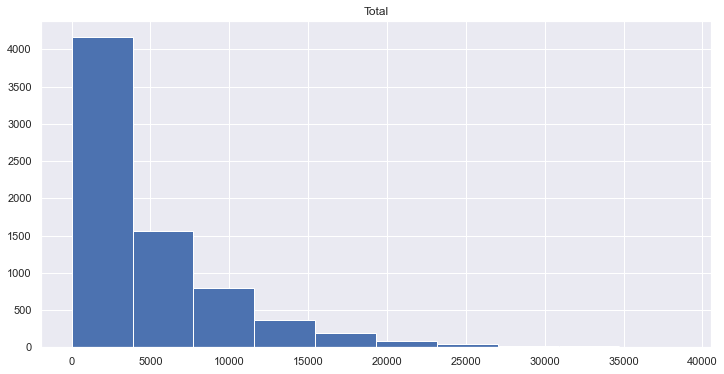

In [301]:
#histogram of numeric values
df[numeric_variables].hist(figsize=(12, 6))

Check Normal Distribution on Features/Target (Skew)
====

In [302]:
#looking at which columns are numbers
df.select_dtypes('number').columns

Index(['Total'], dtype='object')

In [303]:
# Create a list of float colums to check for skewing
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [304]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Total,1.903055


In [305]:
# Create a list of int colums to check for skewing
mask2 = df.dtypes == int
int_cols = df.columns[mask2]

skew_limit = 0.75 # define a limit above which we will skew transform
skew_vals2 = df[int_cols].skew()

In [306]:
# Showing the skewed columns
skew_cols = (skew_vals2
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew


Transformation of Target
====

In [307]:
from scipy.stats import boxcox
bc_result = boxcox(df.Total)
df['Total'] = bc_result[0]

In [308]:
#Check Skew
df['Total'].skew()

-0.09468062393103377

Check Normal Distribution After Transformation
====

In [309]:
#Check Normal Distribution
z,pval = normaltest(df.Total)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


<AxesSubplot:>

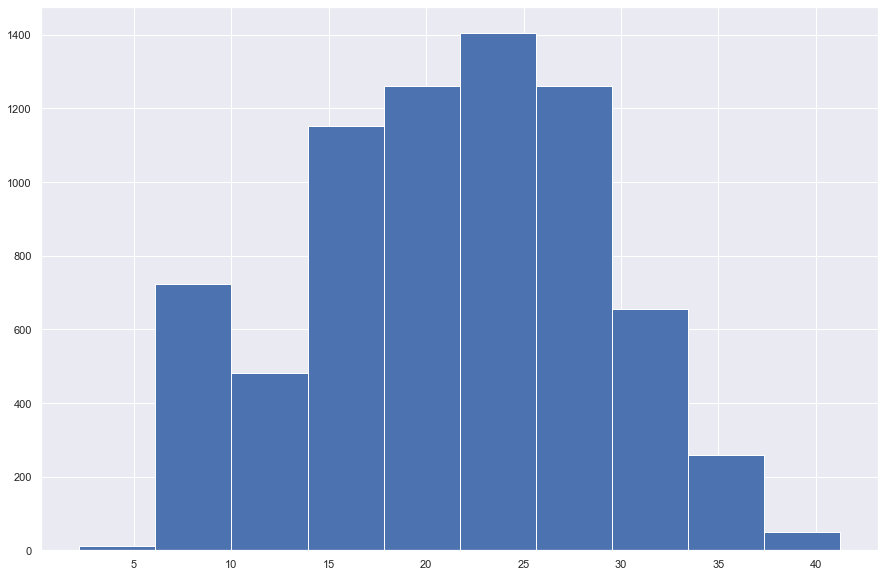

In [310]:
#histogram of numeric values
df['Total'].hist()

In [311]:
#Transformed data with transformation for SAS use to double check work.
df.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Day_T_Processed.csv')

Statistics ANOVA
====

In [312]:
df = pd.read_csv(r"C:\Users\2-1\Downloads\Sales_Day_T_Processed.csv", header=0)

In [313]:
df.head()

,Unnamed: 0,Region,Category,Total
0,0,Northeast,Accessories,18.998580
1,1,Northeast,Appliance,13.909787
2,2,Northeast,Batteries,7.357234
3,3,Northeast,Laptop,24.902277
4,4,Northeast,Monitor,21.085142


In [314]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [315]:
df.head()

,Region,Category,Total
0,Northeast,Accessories,18.998580
1,Northeast,Appliance,13.909787
2,Northeast,Batteries,7.357234
3,Northeast,Laptop,24.902277
4,Northeast,Monitor,21.085142


In [316]:
#Statistics ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

product_lm = ols('Total ~ C(Category) + C(Region) + C(Category)*C(Region)', data=df).fit()

table = sm.stats.anova_lm(product_lm, typ=1) # N-Way Anova
summary1 = product_lm.summary()
summary2 = product_lm.summary2()
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Category),6.0,323071.301139,53845.216856,8326.270824,0.000000e+00
C(Region),2.0,35855.645555,17927.822777,2772.240813,0.000000e+00
C(Category):C(Region),12.0,4403.958976,366.996581,56.749942,1.160105e-131
Residual,7240.0,46820.404749,6.466907,NaN,NaN


In [317]:
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     2809.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:04:38   Log-Likelihood:                -17069.
No. Observations:                7261   AIC:                         3.418e+04
Df Residuals:                    7240   BIC:                         3.433e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      21.7367      0.133    163.526      0.000      21.476      21.997
C(Category)[T.Appliance]                       -6.5962      0.219    -30.187      0.000      -7.025      -6.168
C(Category)[T.Batteries]                      -13.0191      0.188    -69.256      0.000     -13.388     -12.651
C(Category)[T.Laptop]                           5.9003      0.188     31.366      0.000       5.532       6.269
C(Category)[T.Monitor]                          2.0188      0.188     10.732      0.000       1.650       2.388
C(Category)[T.Phone]                            3.9558      0.188     21.043      0.000       3.587       4.324
C(Category)[T.TV]                              -5.8119      0.191    -30.480      0.000      -6.186      -5.438
C(Region)[T.South]                             -0.9983      0.188     -5.311      0.000      -1.367      -0.630
C(Region)[T.West]                               4.6975      0.188     24.989      0.000       4.329       5.066
C(Category)[T.Appliance]:C(Region)[T.South]     0.9686      0.313      3.098      0.002       0.356       1.582
C(Category)[T.Batteries]:C(Region)[T.South]     0.4615      0.266      1.736      0.083      -0.060       0.983
C(Category)[T.Laptop]:C(Region)[T.South]       -0.2300      0.266     -0.864      0.388      -0.752       0.292
C(Category)[T.Monitor]:C(Region)[T.South]      -0.3156      0.266     -1.187      0.235      -0.837       0.206
C(Category)[T.Phone]:C(Region)[T.South]        -0.1855      0.266     -0.698      0.485      -0.707       0.336
C(Category)[T.TV]:C(Region)[T.South]            0.2311      0.270      0.857      0.392      -0.298       0.760
C(Category)[T.Appliance]:C(Region)[T.West]     -2.7628      0.294     -9.398      0.000      -3.339      -2.187
C(Category)[T.Batteries]:C(Region)[T.West]     -2.3619      0.266     -8.884      0.000      -2.883      -1.841
C(Category)[T.Laptop]:C(Region)[T.West]         1.1887      0.266      4.468      0.000       0.667       1.710
C(Category)[T.Monitor]:C(Region)[T.West]        0.2616      0.266      0.984      0.325      -0.260       0.783
C(Category)[T.Phone]:C(Region)[T.West]          0.8355      0.266      3.143      0.002       0.314       1.357
C(Category)[T.TV]:C(Region)[T.West]            -1.5051      0.268     -5.619      0.000      -2.030      -0.980
==============================================================================
Omnibus:                      535.132   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.642
Skew:                          -0.430   Prob(JB):                    8.60e-299
Kurtosis:                       4.949   Cond. No.                         28.8


In [318]:
summary2

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                        OLS                       Adj. R-squared:              0.886     
Dependent Variable:           Total                     AIC:                         34180.8884
Date:                         2022-04-19 19:04          BIC:                         34325.5841
No. Observations:             7261                      Log-Likelihood:              -17069.   
Df Model:                     20                        F-statistic:                 2809.     
Df Residuals:                 7240                      Prob (F-statistic):          0.00      
R-squared:                    0.886                     Scale:                       6.4669    
-----------------------------------------------------------------------------------------------
                                             Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------------------------------------
Intercept                                    21.7367   0.1329 163.5255 0.0000  21.4761  21.9973
C(Category)[T.Appliance]                     -6.5962   0.2185 -30.1870 0.0000  -7.0246  -6.1679
C(Category)[T.Batteries]                    -13.0191   0.1880 -69.2563 0.0000 -13.3876 -12.6506
C(Category)[T.Laptop]                         5.9003   0.1881  31.3659 0.0000   5.5316   6.2691
C(Category)[T.Monitor]                        2.0188   0.1881  10.7319 0.0000   1.6501   2.3876
C(Category)[T.Phone]                          3.9558   0.1880  21.0433 0.0000   3.5873   4.3243
C(Category)[T.TV]                            -5.8119   0.1907 -30.4795 0.0000  -6.1857  -5.4381
C(Region)[T.South]                           -0.9983   0.1880  -5.3108 0.0000  -1.3669  -0.6298
C(Region)[T.West]                             4.6975   0.1880  24.9885 0.0000   4.3290   5.0660
C(Category)[T.Appliance]:C(Region)[T.South]   0.9686   0.3127   3.0981 0.0020   0.3557   1.5815
C(Category)[T.Batteries]:C(Region)[T.South]   0.4615   0.2659   1.7355 0.0827  -0.0598   0.9829
C(Category)[T.Laptop]:C(Region)[T.South]     -0.2300   0.2662  -0.8641 0.3876  -0.7519   0.2918
C(Category)[T.Monitor]:C(Region)[T.South]    -0.3156   0.2659  -1.1868 0.2354  -0.8369   0.2057
C(Category)[T.Phone]:C(Region)[T.South]      -0.1855   0.2659  -0.6976 0.4854  -0.7069   0.3358
C(Category)[T.TV]:C(Region)[T.South]          0.2311   0.2698   0.8566 0.3917  -0.2977   0.7599
C(Category)[T.Appliance]:C(Region)[T.West]   -2.7628   0.2940  -9.3984 0.0000  -3.3390  -2.1865
C(Category)[T.Batteries]:C(Region)[T.West]   -2.3619   0.2659  -8.8843 0.0000  -2.8830  -1.8408
C(Category)[T.Laptop]:C(Region)[T.West]       1.1887   0.2660   4.4683 0.0000   0.6672   1.7102
C(Category)[T.Monitor]:C(Region)[T.West]      0.2616   0.2659   0.9839 0.3252  -0.2597   0.7830
C(Category)[T.Phone]:C(Region)[T.West]        0.8355   0.2659   3.1429 0.0017   0.3144   1.3567
C(Category)[T.TV]:C(Region)[T.West]          -1.5051   0.2679  -5.6192 0.0000  -2.0302  -0.9801
-----------------------------------------------------------------------------------------------
Omnibus:                       535.132                Durbin-Watson:                   1.344   
Prob(Omnibus):                 0.000                  Jarque-Bera (JB):                1372.642
Skew:                          -0.430                 Prob(JB):                        0.000   
Kurtosis:                      4.949                  Condition No.:                   29      
===============================================================================================

"""

Machine Learning: Linear Regression
===

Binary: Encoder
===

In [319]:
lb, le, oe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()
#binary
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

Ordinal: Label Encoder
====

In [320]:
#Ordinal
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

Nominal: Encoder
==

In [321]:
#Nominal
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
df = pd.get_dummies(df, columns = categorical_variables, drop_first=False)

Extract X/Y (Target / Features)
====

In [322]:
#Normal
y, X = df['Total'], df.drop(columns='Total')

In [323]:
#create Train/Test for Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [324]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [325]:
y_prediction =  LR.predict(X_test)
y_prediction

array([15.6484375, 27.3203125, 30.109375 , ..., 27.9609375, 22.0078125,
        8.2890625])

In [326]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print(score)

0.8631751350891195


In [327]:
X.columns

Index(['Category_Accessories', 'Category_Appliance', 'Category_Batteries',
       'Category_Laptop', 'Category_Monitor', 'Category_Phone', 'Category_TV',
       'Region_Northeast', 'Region_South', 'Region_West'],
      dtype='object')

In [328]:
print('Intercept: \n', LR.intercept_)
print('Coefficients: \n', LR.coef_)

Intercept: 
 49487808434897.14
Coefficients: 
 [-8.29863730e+12 -8.29863730e+12 -8.29863730e+12 -8.29863730e+12
 -8.29863730e+12 -8.29863730e+12 -8.29863730e+12 -4.11891711e+13
 -4.11891711e+13 -4.11891711e+13]


ARIMA
====

In [413]:
df = pd.read_csv(r"C:\Users\2-1\Downloads\Sales_Day_Total_Processed.csv", header=0, index_col=0, parse_dates=True)

In [414]:
#Take a look at what's inside of the data
df.head()

,Total
Order_Day,
2019-01-01,65681.94
2019-01-02,70663.20
2019-01-03,47046.20
2019-01-04,62000.22
2019-01-05,46524.63


In [415]:
#Transform date index from string type to date type
df.index = pd.DatetimeIndex(df.index).to_period('D')

<AxesSubplot:xlabel='Order_Day'>

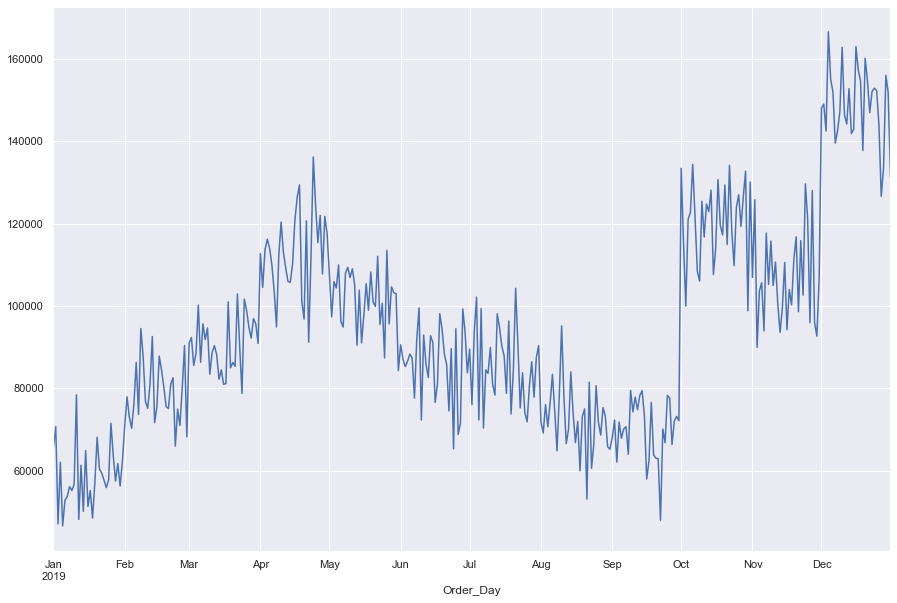

In [416]:
#Draw plot chart
df["Total"].plot()

In [417]:
df.tail()

,Total
Order_Day,
2019-12-27,126604.07
2019-12-28,133601.53
2019-12-29,156009.67
2019-12-30,151857.82
2019-12-31,131439.32


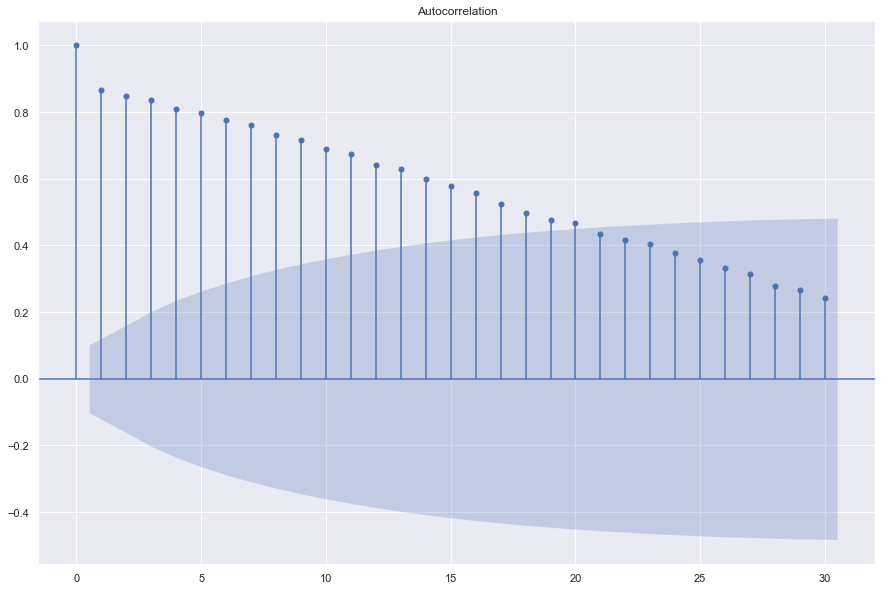

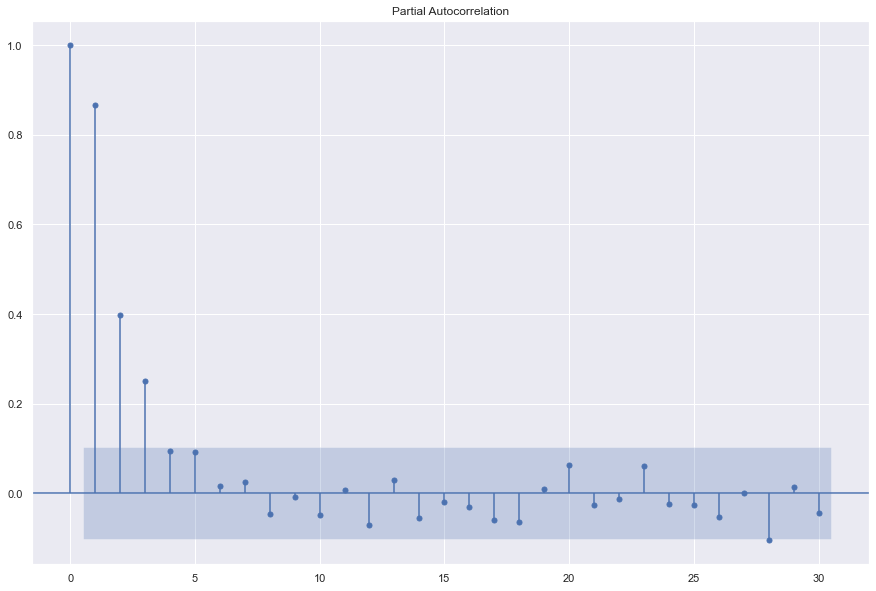

In [418]:
#Part II: Draw ACF and PACF Plot Charts to identify the order of AR or MA or ARMA model
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=30) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(df.values.squeeze(), lags=30)
plt.show()

In [419]:
#How to differencing data if there is a trend in original data?
from statsmodels.tsa.statespace.tools import diff 
diff=diff(df, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

In [420]:
diff = pd.DataFrame(diff)

In [421]:
diff.head()

,Total
Order_Day,
2019-01-02,4981.26
2019-01-03,-23617.00
2019-01-04,14954.02
2019-01-05,-15475.59
2019-01-06,6237.91


In [422]:
#Export
diff.to_csv('C:\\Users\\2-1\\Downloads\\Sales_Diff_Processed.csv')

In [424]:
#Import
diff = pd.read_csv(r"C:\Users\2-1\Downloads\Sales_Diff_Processed.csv", header=0, index_col=0, parse_dates=True)

<AxesSubplot:xlabel='Order_Day', ylabel='Total'>

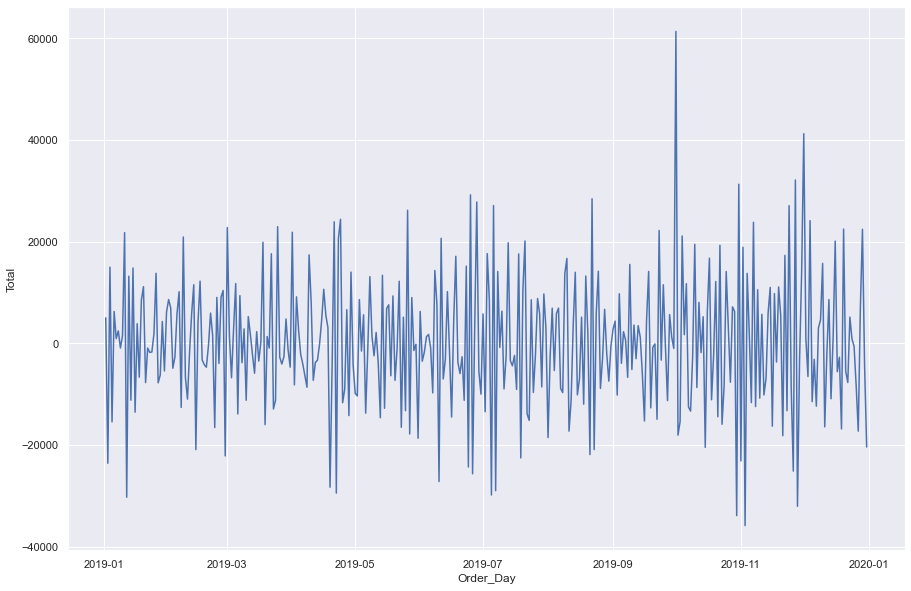

In [425]:
sns.lineplot(data=diff, x="Order_Day", y="Total")

In [426]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.044855
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [410]:
#import model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(20, 1, 4))
model_fit = model.fit()

C:\Users\2-1\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [411]:
print(model_fit.forecast(10))

2020-01-01    141461.910207
2020-01-02    140687.706433
2020-01-03    135500.499216
2020-01-04    135730.843742
2020-01-05    137698.087326
2020-01-06    136052.943951
2020-01-07    137194.902721
2020-01-08    139019.029158
2020-01-09    137475.593617
2020-01-10    139337.162733
Freq: D, Name: predicted_mean, dtype: float64


In [412]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  365
Model:                ARIMA(20, 1, 4)   Log Likelihood               -3897.412
Date:                Tue, 19 Apr 2022   AIC                           7844.825
Time:                        19:45:24   BIC                           7942.254
Sample:                    01-01-2019   HQIC                          7883.548
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0793      0.160      0.495      0.620      -0.234       0.393
ar.L2         -0.1418      0.149     -0.952      0.341      -0.434       0.150
ar.L3          0.7071      0.141      5.026      0.0